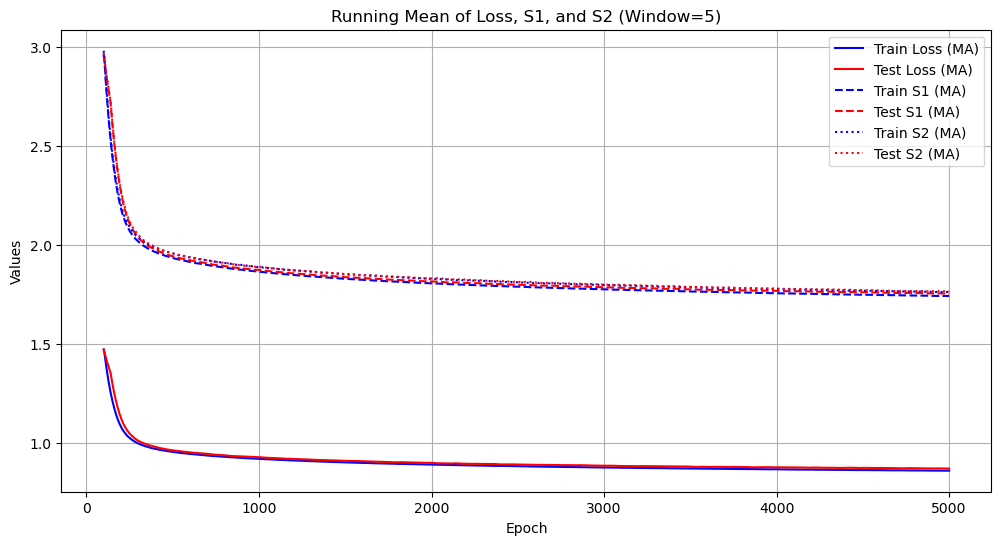

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read data from text file
dir = "results/Emulator_hist_future/ALPS/with-orog/super/lr8_hr4/var-tasmax/loc-specific-layers_norm-out-normalise_pw_dec0_lam-mse0_split-residTrue/"
#/r/scratch/users/mschillinger/code/cordexbench/enscale/
data = []
with open(os.path.join(dir, "log_super.txt"), "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) < 2:
            continue
        set_type, rest = parts[0].split(" [Epoch ")
        epoch = int(rest.split("]")[0])
        metrics = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
        metrics["Epoch"] = epoch
        metrics["Type"] = set_type
        data.append(metrics)

df = pd.DataFrame(data)

# Separate train and test data
train_df = df[df["Type"] == "Train-sup"].sort_values("Epoch")
test_df = df[df["Type"] == "Test-sup"].sort_values("Epoch")

first_epoch = 100
train_df = train_df[train_df["Epoch"] >= first_epoch]
test_df = test_df[test_df["Epoch"] >= first_epoch]

# Define moving average window
window_size = 5
for col in ["loss", "s1", "s2"]:
    train_df[f"{col}_ma"] = train_df[col].rolling(window=window_size, min_periods=1).mean()
    test_df[f"{col}_ma"] = test_df[col].rolling(window=window_size, min_periods=1).mean()

# Plot loss, s1, and s2
plt.figure(figsize=(12, 6))

plt.plot(train_df["Epoch"], train_df["loss_ma"], label="Train Loss (MA)", color="blue", linestyle="-")
plt.plot(test_df["Epoch"], test_df["loss_ma"], label="Test Loss (MA)", color="red", linestyle="-")

plt.plot(train_df["Epoch"], train_df["s1_ma"], label="Train S1 (MA)", color="blue", linestyle="--")
plt.plot(test_df["Epoch"], test_df["s1_ma"], label="Test S1 (MA)", color="red", linestyle="--")

plt.plot(train_df["Epoch"], train_df["s2_ma"], label="Train S2 (MA)", color="blue", linestyle=":")
plt.plot(test_df["Epoch"], test_df["s2_ma"], label="Test S2 (MA)", color="red", linestyle=":")

plt.xlabel("Epoch")
plt.ylabel("Values")
plt.title(f"Running Mean of Loss, S1, and S2 (Window={window_size})")
plt.legend()
plt.grid()
plt.show()

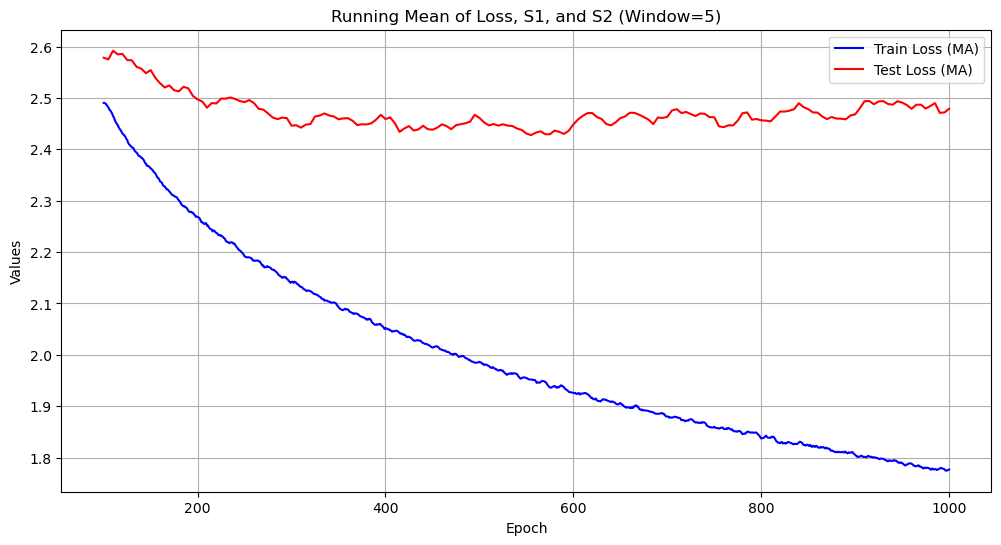

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read data from text file
# dir = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-tasmax/hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100/"
# dir = "results/ESD_pseudo_reality/NZ/no-orog/coarse/var-tasmax/hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100_sorted-pred/"
dir = "results/ESD_pseudo_reality/NZ/no-orog/coarse/var-pr/hd-100_num-lay-6_norm-out-scale_pw_relu_norm-in-normalise_scalar_nd-100_sorted-pred/"
#/r/scratch/users/mschillinger/code/cordexbench/enscale/
data = []
with open(os.path.join(dir, "log_coarse.txt"), "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) < 2:
            continue
        set_type, rest = parts[0].split(" [Epoch ")
        epoch = int(rest.split("]")[0])
        metrics = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
        metrics["Epoch"] = epoch
        metrics["Type"] = set_type
        data.append(metrics)

df = pd.DataFrame(data)

# Separate train and test data
train_df = df[df["Type"] == "Train-crs"].sort_values("Epoch")
test_df = df[df["Type"] == "Test-crs"].sort_values("Epoch")

first_epoch = 100
train_df = train_df[train_df["Epoch"] >= first_epoch]
test_df = test_df[test_df["Epoch"] >= first_epoch]

# Define moving average window
window_size = 5
for col in ["loss", "s1", "s2"]:
    train_df[f"{col}_ma"] = train_df[col].rolling(window=window_size, min_periods=1).mean()
    test_df[f"{col}_ma"] = test_df[col].rolling(window=window_size, min_periods=1).mean()

# Plot loss, s1, and s2
plt.figure(figsize=(12, 6))

plt.plot(train_df["Epoch"], train_df["loss_ma"], label="Train Loss (MA)", color="blue", linestyle="-")
plt.plot(test_df["Epoch"], test_df["loss_ma"], label="Test Loss (MA)", color="red", linestyle="-")

#plt.plot(train_df["Epoch"], train_df["s1_ma"], label="Train S1 (MA)", color="blue", linestyle="--")
#plt.plot(test_df["Epoch"], test_df["s1_ma"], label="Test S1 (MA)", color="red", linestyle="--")

#plt.plot(train_df["Epoch"], train_df["s2_ma"], label="Train S2 (MA)", color="blue", linestyle=":")
#plt.plot(test_df["Epoch"], test_df["s2_ma"], label="Test S2 (MA)", color="red", linestyle=":")

plt.xlabel("Epoch")
plt.ylabel("Values")
plt.title(f"Running Mean of Loss, S1, and S2 (Window={window_size})")
plt.legend()
plt.grid()
plt.show()

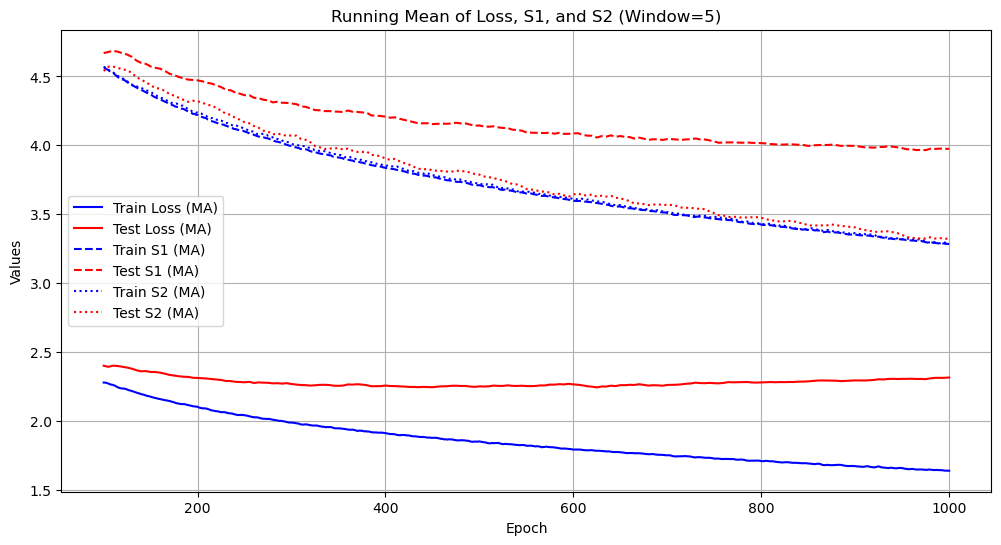

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read data from text file
dir = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-pr/hd-200_num-lay-6_norm-out-scale_pw_relu_norm-in-normalise_scalar/"
#/r/scratch/users/mschillinger/code/cordexbench/enscale/
data = []
with open(os.path.join(dir, "log_coarse.txt"), "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) < 2:
            continue
        set_type, rest = parts[0].split(" [Epoch ")
        epoch = int(rest.split("]")[0])
        metrics = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
        metrics["Epoch"] = epoch
        metrics["Type"] = set_type
        data.append(metrics)

df = pd.DataFrame(data)

# Separate train and test data
train_df = df[df["Type"] == "Train-crs"].sort_values("Epoch")
test_df = df[df["Type"] == "Test-crs"].sort_values("Epoch")

first_epoch = 100
train_df = train_df[train_df["Epoch"] >= first_epoch]
test_df = test_df[test_df["Epoch"] >= first_epoch]

# Define moving average window
window_size = 5
for col in ["loss", "s1", "s2"]:
    train_df[f"{col}_ma"] = train_df[col].rolling(window=window_size, min_periods=1).mean()
    test_df[f"{col}_ma"] = test_df[col].rolling(window=window_size, min_periods=1).mean()

# Plot loss, s1, and s2
plt.figure(figsize=(12, 6))

plt.plot(train_df["Epoch"], train_df["loss_ma"], label="Train Loss (MA)", color="blue", linestyle="-")
plt.plot(test_df["Epoch"], test_df["loss_ma"], label="Test Loss (MA)", color="red", linestyle="-")

plt.plot(train_df["Epoch"], train_df["s1_ma"], label="Train S1 (MA)", color="blue", linestyle="--")
plt.plot(test_df["Epoch"], test_df["s1_ma"], label="Test S1 (MA)", color="red", linestyle="--")

plt.plot(train_df["Epoch"], train_df["s2_ma"], label="Train S2 (MA)", color="blue", linestyle=":")
plt.plot(test_df["Epoch"], test_df["s2_ma"], label="Test S2 (MA)", color="red", linestyle=":")

plt.xlabel("Epoch")
plt.ylabel("Values")
plt.title(f"Running Mean of Loss, S1, and S2 (Window={window_size})")
plt.legend()
plt.grid()
plt.show()

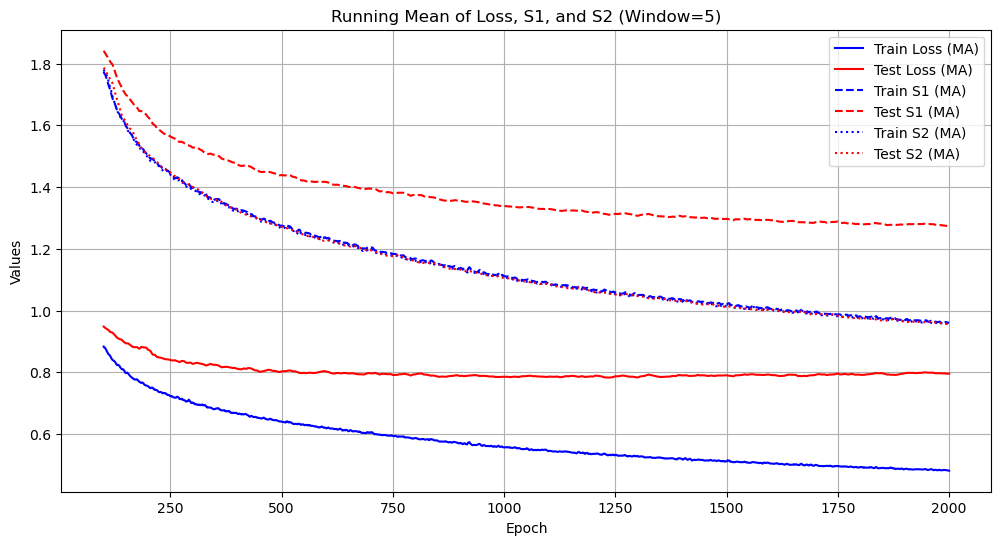

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read data from text file
dir = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-tasmax/hd-200_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar/"
#/r/scratch/users/mschillinger/code/cordexbench/enscale/
data = []
with open(os.path.join(dir, "log_coarse.txt"), "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) < 2:
            continue
        set_type, rest = parts[0].split(" [Epoch ")
        epoch = int(rest.split("]")[0])
        metrics = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
        metrics["Epoch"] = epoch
        metrics["Type"] = set_type
        data.append(metrics)

df = pd.DataFrame(data)

# Separate train and test data
train_df = df[df["Type"] == "Train-crs"].sort_values("Epoch")
test_df = df[df["Type"] == "Test-crs"].sort_values("Epoch")

first_epoch = 100
train_df = train_df[train_df["Epoch"] >= first_epoch]
test_df = test_df[test_df["Epoch"] >= first_epoch]

# Define moving average window
window_size = 5
for col in ["loss", "s1", "s2"]:
    train_df[f"{col}_ma"] = train_df[col].rolling(window=window_size, min_periods=1).mean()
    test_df[f"{col}_ma"] = test_df[col].rolling(window=window_size, min_periods=1).mean()

# Plot loss, s1, and s2
plt.figure(figsize=(12, 6))

plt.plot(train_df["Epoch"], train_df["loss_ma"], label="Train Loss (MA)", color="blue", linestyle="-")
plt.plot(test_df["Epoch"], test_df["loss_ma"], label="Test Loss (MA)", color="red", linestyle="-")

plt.plot(train_df["Epoch"], train_df["s1_ma"], label="Train S1 (MA)", color="blue", linestyle="--")
plt.plot(test_df["Epoch"], test_df["s1_ma"], label="Test S1 (MA)", color="red", linestyle="--")

plt.plot(train_df["Epoch"], train_df["s2_ma"], label="Train S2 (MA)", color="blue", linestyle=":")
plt.plot(test_df["Epoch"], test_df["s2_ma"], label="Test S2 (MA)", color="red", linestyle=":")

plt.xlabel("Epoch")
plt.ylabel("Values")
plt.title(f"Running Mean of Loss, S1, and S2 (Window={window_size})")
plt.legend()
plt.grid()
plt.show()

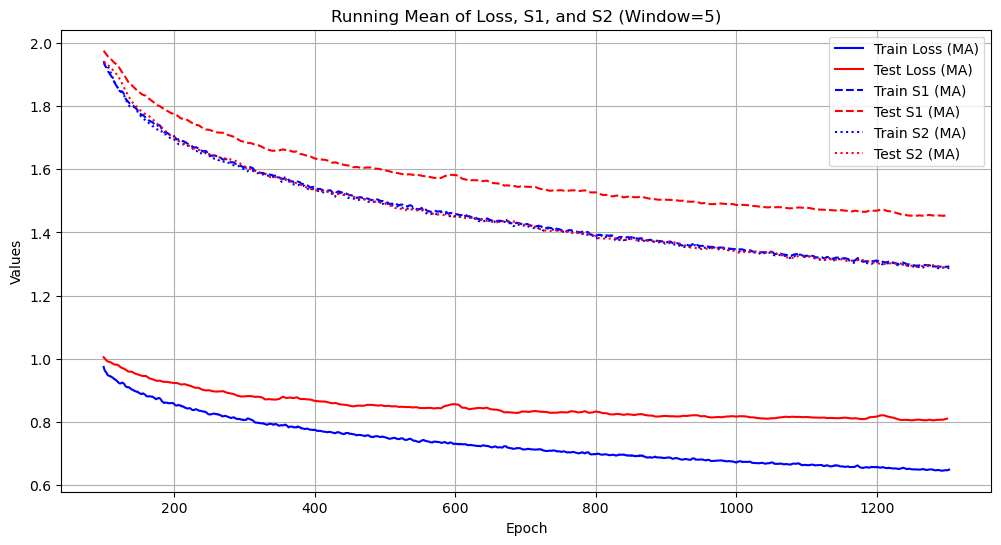

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read data from text file
dir = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-tasmax/hd-200_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_mini/"
#/r/scratch/users/mschillinger/code/cordexbench/enscale/
data = []
with open(os.path.join(dir, "log_coarse.txt"), "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) < 2:
            continue
        set_type, rest = parts[0].split(" [Epoch ")
        epoch = int(rest.split("]")[0])
        metrics = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
        metrics["Epoch"] = epoch
        metrics["Type"] = set_type
        data.append(metrics)

df = pd.DataFrame(data)

# Separate train and test data
train_df = df[df["Type"] == "Train-crs"].sort_values("Epoch")
test_df = df[df["Type"] == "Test-crs"].sort_values("Epoch")

first_epoch = 100
train_df = train_df[train_df["Epoch"] >= first_epoch]
test_df = test_df[test_df["Epoch"] >= first_epoch]

# Define moving average window
window_size = 5
for col in ["loss", "s1", "s2"]:
    train_df[f"{col}_ma"] = train_df[col].rolling(window=window_size, min_periods=1).mean()
    test_df[f"{col}_ma"] = test_df[col].rolling(window=window_size, min_periods=1).mean()

# Plot loss, s1, and s2
plt.figure(figsize=(12, 6))

plt.plot(train_df["Epoch"], train_df["loss_ma"], label="Train Loss (MA)", color="blue", linestyle="-")
plt.plot(test_df["Epoch"], test_df["loss_ma"], label="Test Loss (MA)", color="red", linestyle="-")

plt.plot(train_df["Epoch"], train_df["s1_ma"], label="Train S1 (MA)", color="blue", linestyle="--")
plt.plot(test_df["Epoch"], test_df["s1_ma"], label="Test S1 (MA)", color="red", linestyle="--")

plt.plot(train_df["Epoch"], train_df["s2_ma"], label="Train S2 (MA)", color="blue", linestyle=":")
plt.plot(test_df["Epoch"], test_df["s2_ma"], label="Test S2 (MA)", color="red", linestyle=":")

plt.xlabel("Epoch")
plt.ylabel("Values")
plt.title(f"Running Mean of Loss, S1, and S2 (Window={window_size})")
plt.legend()
plt.grid()
plt.show()

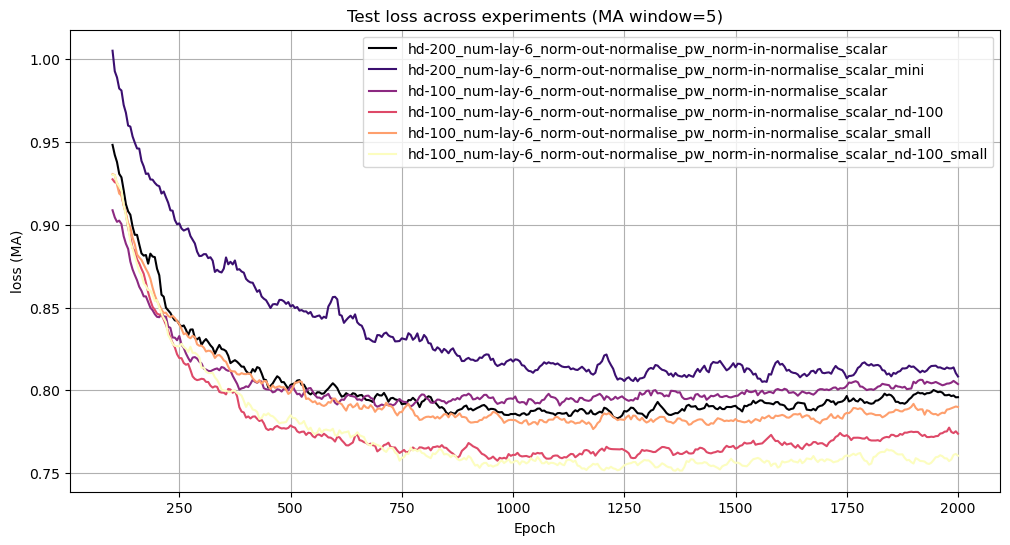

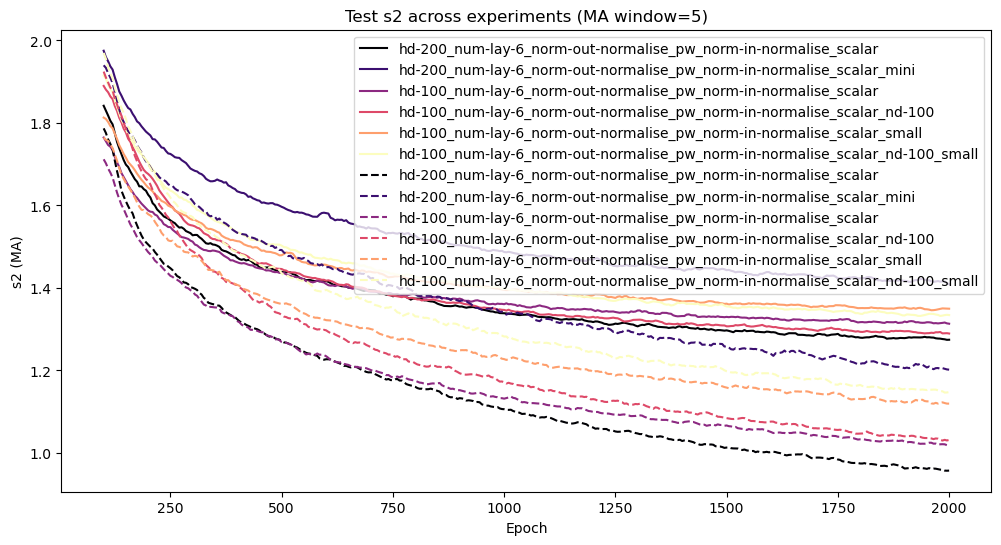

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# Read data from text file
# Loop over multiple experiment folders and plot only TEST metrics for each
base = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-tasmax/"
dirs = [
    os.path.join(base, "hd-200_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar/"),
    os.path.join(base, "hd-200_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_mini/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100/"),
    # hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_small, hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_small_nd-100
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_small/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100_small/"),
]
first_epoch = 100
window_size = 5
# get a few colors automatically
colors = plt.cm.magma(np.linspace(0, 1, len(dirs)))
for col in ["loss", "s1", "s2"]:
    metric = col
    if metric == "loss" or metric == "s1":
        plt.figure(figsize=(12, 6))
    for i, d in enumerate(dirs):
        records = []
        with open(os.path.join(d, "log_coarse.txt"), "r") as f:
            for line in f:
                parts = line.strip().split("\t")
                if len(parts) < 2:
                    continue
                set_type, rest = parts[0].split(" [Epoch ")
                ep = int(rest.split("]")[0])
                m = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
                m["Epoch"] = ep
                m["Type"] = set_type
                records.append(m)

        df_d = pd.DataFrame(records)
        test_df_d = df_d[df_d["Type"] == "Test-crs"].sort_values("Epoch")
        test_df_d = test_df_d[test_df_d["Epoch"] >= first_epoch]

        test_df_d[f"{metric}_ma"] = test_df_d[metric].rolling(window=window_size, min_periods=1).mean()
        label = os.path.basename(d.rstrip("/"))
        if col == "s2":
            # linetype dashed for s1
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, linestyle="--", color=colors[i])
        else:
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, color=colors[i])

    plt.xlabel("Epoch")
    plt.ylabel(f"{metric} (MA)")
    plt.title(f"Test {metric} across experiments (MA window={window_size})")
    plt.legend()
    plt.grid()
    if col == "loss":
        plt.show()
    

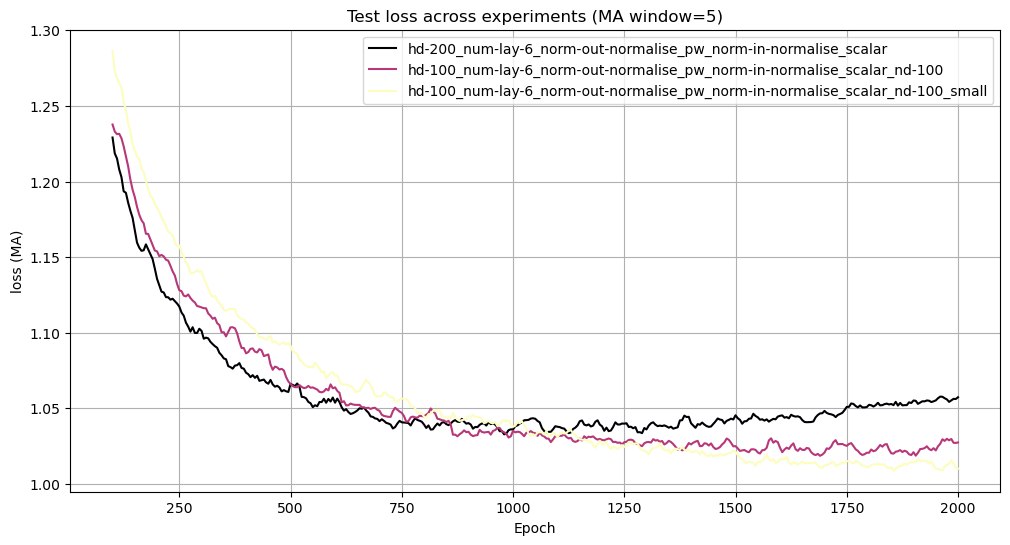

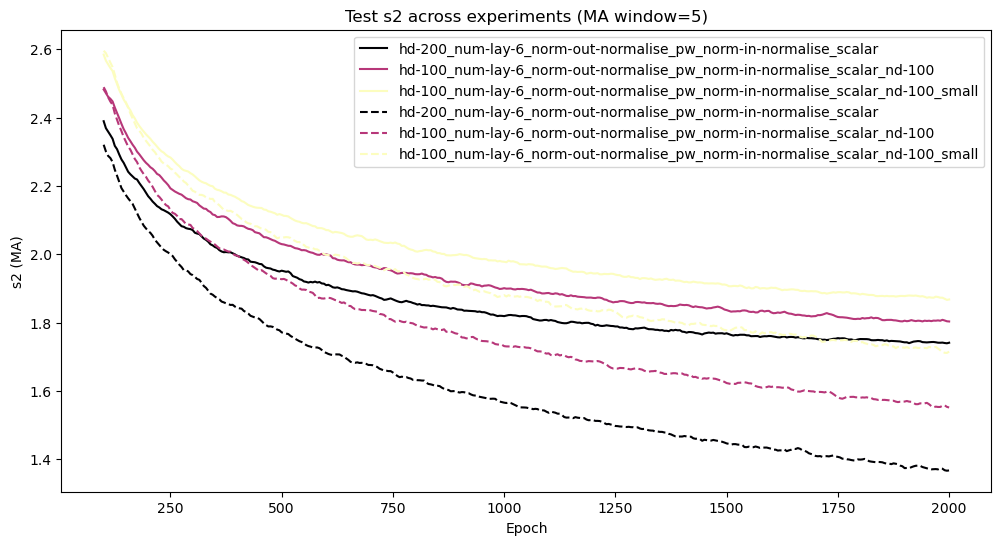

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# Read data from text file
# Loop over multiple experiment folders and plot only TEST metrics for each
base = "results/Emulator_hist_future/SA/no-orog/coarse/var-tasmax/"
dirs = [
    os.path.join(base, "hd-200_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100_small/"),
]
first_epoch = 100
window_size = 5
# get a few colors automatically
colors = plt.cm.magma(np.linspace(0, 1, len(dirs)))
for col in ["loss", "s1", "s2"]:
    metric = col
    if metric == "loss" or metric == "s1":
        plt.figure(figsize=(12, 6))
    for i, d in enumerate(dirs):
        records = []
        with open(os.path.join(d, "log_coarse.txt"), "r") as f:
            for line in f:
                parts = line.strip().split("\t")
                if len(parts) < 2:
                    continue
                set_type, rest = parts[0].split(" [Epoch ")
                ep = int(rest.split("]")[0])
                m = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
                m["Epoch"] = ep
                m["Type"] = set_type
                records.append(m)

        df_d = pd.DataFrame(records)
        test_df_d = df_d[df_d["Type"] == "Test-crs"].sort_values("Epoch")
        test_df_d = test_df_d[test_df_d["Epoch"] >= first_epoch]

        test_df_d[f"{metric}_ma"] = test_df_d[metric].rolling(window=window_size, min_periods=1).mean()
        label = os.path.basename(d.rstrip("/"))
        if col == "s2":
            # linetype dashed for s1
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, linestyle="--", color=colors[i])
        else:
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, color=colors[i])

    plt.xlabel("Epoch")
    plt.ylabel(f"{metric} (MA)")
    plt.title(f"Test {metric} across experiments (MA window={window_size})")
    plt.legend()
    plt.grid()
    if col == "loss":
        plt.show()
    

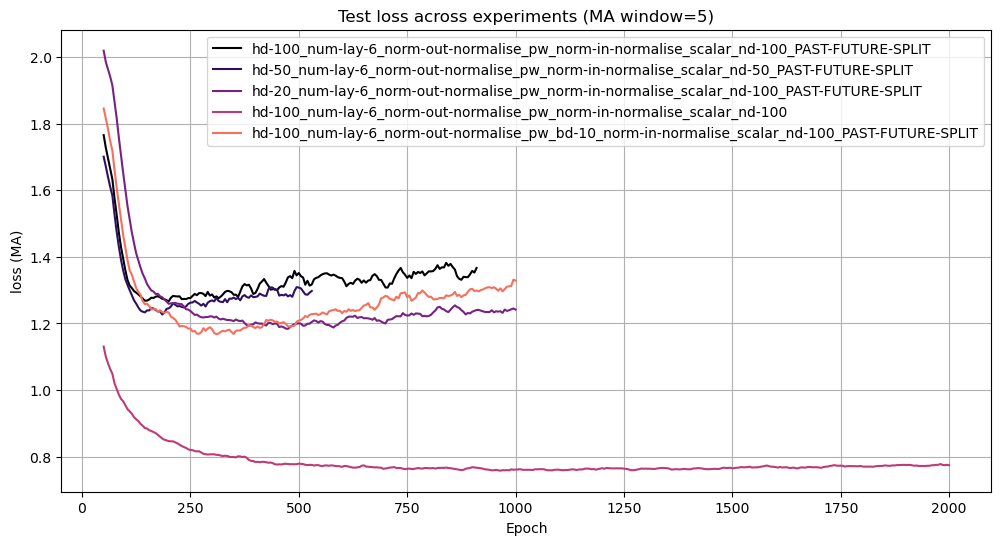

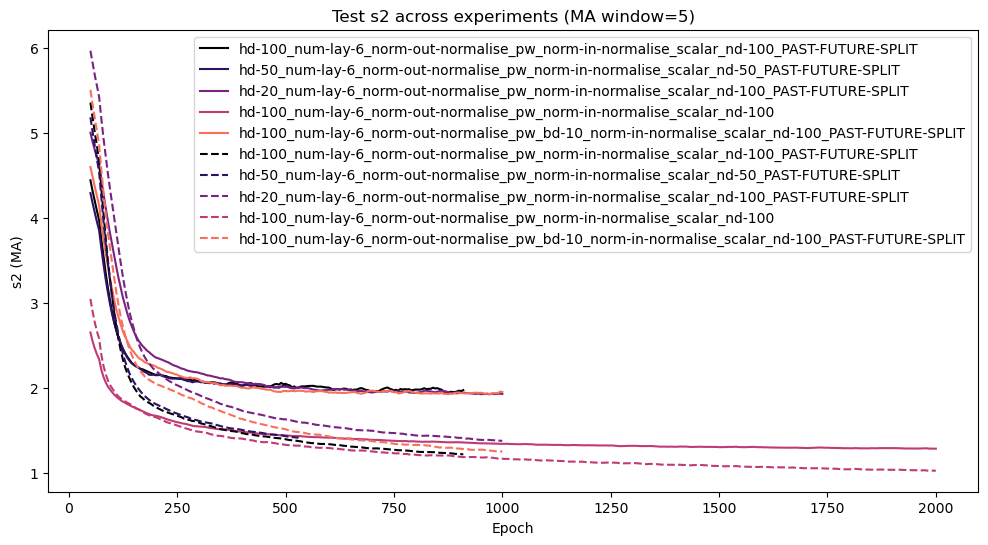

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# Read data from text file
# Loop over multiple experiment folders and plot only TEST metrics for each
base = "results/Emulator_hist_future/ALPS/no-orog/coarse/var-tasmax/"
dirs = [
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100_PAST-FUTURE-SPLIT/"),
    os.path.join(base, "hd-50_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-50_PAST-FUTURE-SPLIT/"),
    os.path.join(base, "hd-20_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100_PAST-FUTURE-SPLIT/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_norm-in-normalise_scalar_nd-100/"),
    os.path.join(base, "hd-100_num-lay-6_norm-out-normalise_pw_bd-10_norm-in-normalise_scalar_nd-100_PAST-FUTURE-SPLIT/"),
]
first_epoch = 50
window_size = 5
# get a few colors automatically
colors = plt.cm.magma(np.linspace(0, 0.7, len(dirs)))
for col in ["loss", "s1", "s2"]:
    metric = col
    if metric == "loss" or metric == "s1":
        plt.figure(figsize=(12, 6))
    for i, d in enumerate(dirs):
        records = []
        with open(os.path.join(d, "log_coarse.txt"), "r") as f:
            for line in f:
                parts = line.strip().split("\t")
                if len(parts) < 2:
                    continue
                set_type, rest = parts[0].split(" [Epoch ")
                ep = int(rest.split("]")[0])
                m = {kv.split(": ")[0]: float(kv.split(": ")[1]) for kv in parts[1].split(", ")}
                m["Epoch"] = ep
                m["Type"] = set_type
                records.append(m)

        df_d = pd.DataFrame(records)
        test_df_d = df_d[df_d["Type"] == "Test-crs"].sort_values("Epoch")
        test_df_d = test_df_d[test_df_d["Epoch"] >= first_epoch]

        test_df_d[f"{metric}_ma"] = test_df_d[metric].rolling(window=window_size, min_periods=1).mean()
        label = os.path.basename(d.rstrip("/"))
        if col == "s2":
            # linetype dashed for s1
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, linestyle="--", color=colors[i])
        else:
            plt.plot(test_df_d["Epoch"], test_df_d[f"{metric}_ma"], label=label, color=colors[i])

    plt.xlabel("Epoch")
    plt.ylabel(f"{metric} (MA)")
    plt.title(f"Test {metric} across experiments (MA window={window_size})")
    plt.legend()
    plt.grid()
    if col == "loss":
        plt.show()
    